In [180]:
#Dependencies

from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt


In [191]:
# Load the Wine dataset from sklearn
wine_data = load_wine()
# Create DataFrame from features (data)
wine_datadf = pd.DataFrame(data=wine_data['data'], columns=wine_data['feature_names'])

# Add target column to DataFrame
wine_datadf['target'] = wine_data['target']

# Display DataFrame
print(wine_datadf.head())
#export to csv
wine_datadf.to_csv('wine_data', index=False)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
# Start Spark session
from pyspark.sql import SparkSession

In [165]:





# Extract features (X) and targets (y)
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name='target')

# Print metadata
print(wine_data.DESCR)

# Print variable information
print(X.info())

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [167]:
# Combine features and targets into a single DataFrame
wine_df = pd.concat([X, y], axis=1)

# Display the first few rows of the DataFrame
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [168]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Descriptive Statistics

In [169]:
#Create df for figures to average scores for each variable by class
class_averages = wine_df.groupby('target').mean()
class_averages.reset_index(inplace=True)
# Define a mapping of current values to new values
value_mapping = {0: 'Cultivar 1', 1: 'Cultivar 2', 2: 'Cultivar 3'}

# Replace the values in the 'target' column using the mapping
class_averages['target'] = class_averages['target'].map(value_mapping)
class_averages.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,Cultivar 1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,Cultivar 2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,Cultivar 3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


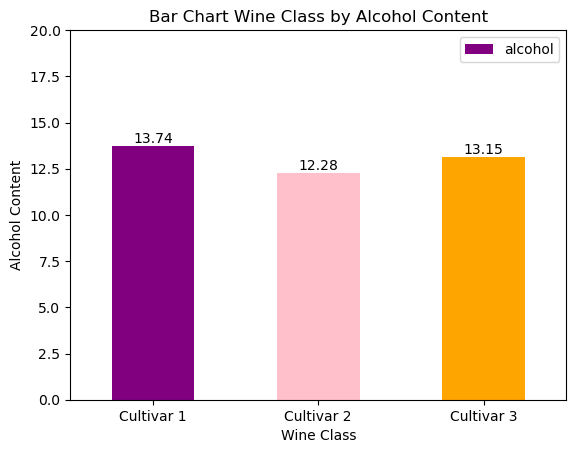

In [170]:
#Descriptive figure for Class by Alcohol
colors = ['purple', 'pink', 'orange']
ax = class_averages.plot(x='target', y='alcohol', kind='bar', color=colors)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Alcohol Content')
plt.title('Bar Chart Wine Class by Alcohol Content')
plt.ylim(0,20)
plt.xticks(rotation=0)

#Add labels
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(), 2)}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Show the plot
plt.show()

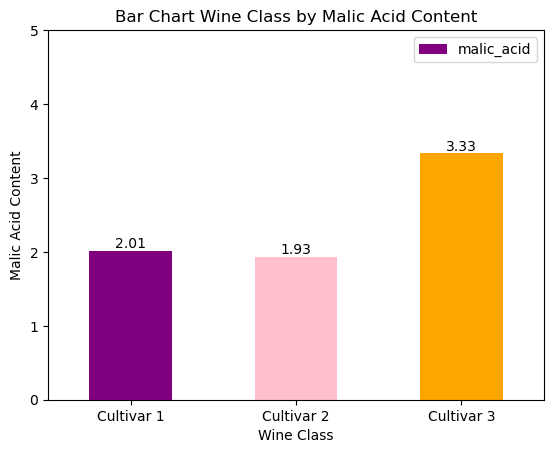

In [171]:
#Descriptive figure for Class by Malic Acid
colors = ['purple', 'pink', 'orange']
ax = class_averages.plot(x='target', y='malic_acid', kind='bar', color=colors)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Malic Acid Content')
plt.title('Bar Chart Wine Class by Malic Acid Content')
plt.ylim(0,5)
plt.xticks(rotation=0)

#Add labels
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(), 2)}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

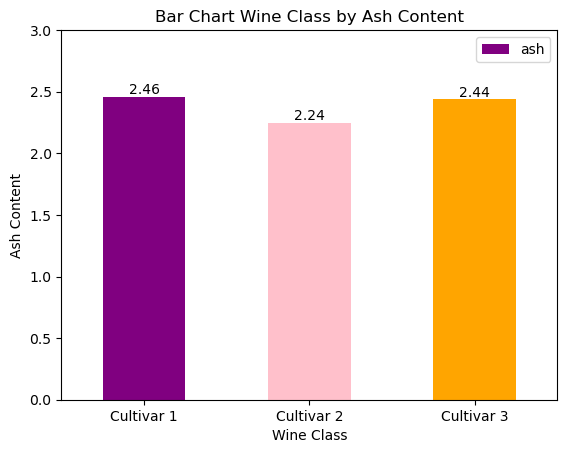

In [172]:
#Descriptive figure for Class by Ash

ax = class_averages.plot(x='target', y='ash', kind='bar', color=colors)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Ash Content')
plt.title('Bar Chart Wine Class by Ash Content')
plt.ylim(0,3)
plt.xticks(rotation=0)

#Add labels
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(), 2)}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

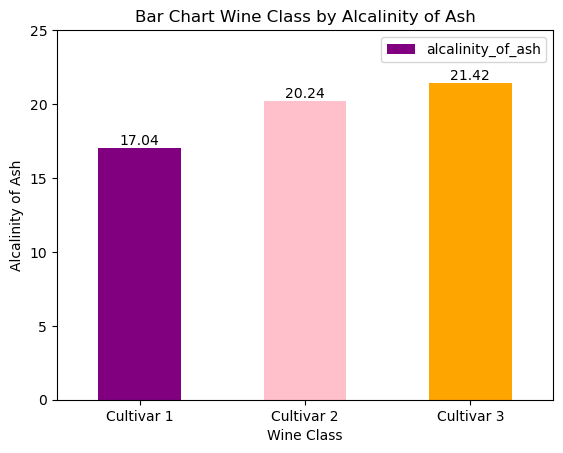

In [173]:
#Descriptive figure for Class by Alcalinity of Ash
colors = ['purple', 'pink', 'orange']
ax = class_averages.plot(x='target', y='alcalinity_of_ash', kind='bar', color=colors)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Alcalinity of Ash')
plt.title('Bar Chart Wine Class by Alcalinity of Ash')
plt.ylim(0,25)
plt.xticks(rotation=0)

#Add labels
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(), 2)}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

# Random Forest Model

### Preprecessing data

In [127]:
#Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
from sklearn.tree import export_graphviz
from sklearn import tree

In [151]:
# Features set already defined above as X and target as y 
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [152]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitting Random Forest Model

In [153]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

### Making predictions for Random Forest Model

In [154]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

### Model Evaluation

In [155]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 1", "Predicted 2", "Predicted 3"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [156]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 2,Predicted 3
Actual 1,18,0,0
Actual 2,1,16,0
Actual 3,0,0,10


Accuracy Score : 0.9777777777777777
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Feature importance

In [157]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.18249140706823289, 'proline'),
 (0.17728146567419342, 'flavanoids'),
 (0.13444187309044076, 'color_intensity'),
 (0.10904617196675631, 'od280/od315_of_diluted_wines'),
 (0.1065989801453544, 'alcohol'),
 (0.09046268649345367, 'hue'),
 (0.059127022809154474, 'total_phenols'),
 (0.03966091346545501, 'malic_acid'),
 (0.033142238184283135, 'magnesium'),
 (0.02253061667624101, 'alcalinity_of_ash'),
 (0.018866538236705442, 'proanthocyanins'),
 (0.016305113369953318, 'ash'),
 (0.010044972819776168, 'nonflavanoid_phenols')]

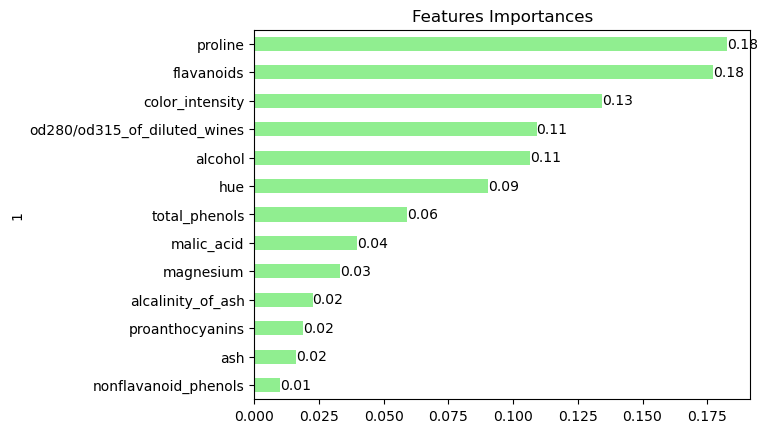

In [163]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')


# Plot the horizontal bar chart
ax = importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)

# Add data labels to the bars
for i, v in enumerate(importances_sorted['Feature Importances']):
    ax.text(v, i, f'{v:.2f}', ha='left', va='center')  # Display the value of each bar

# Show the plot
plt.show()

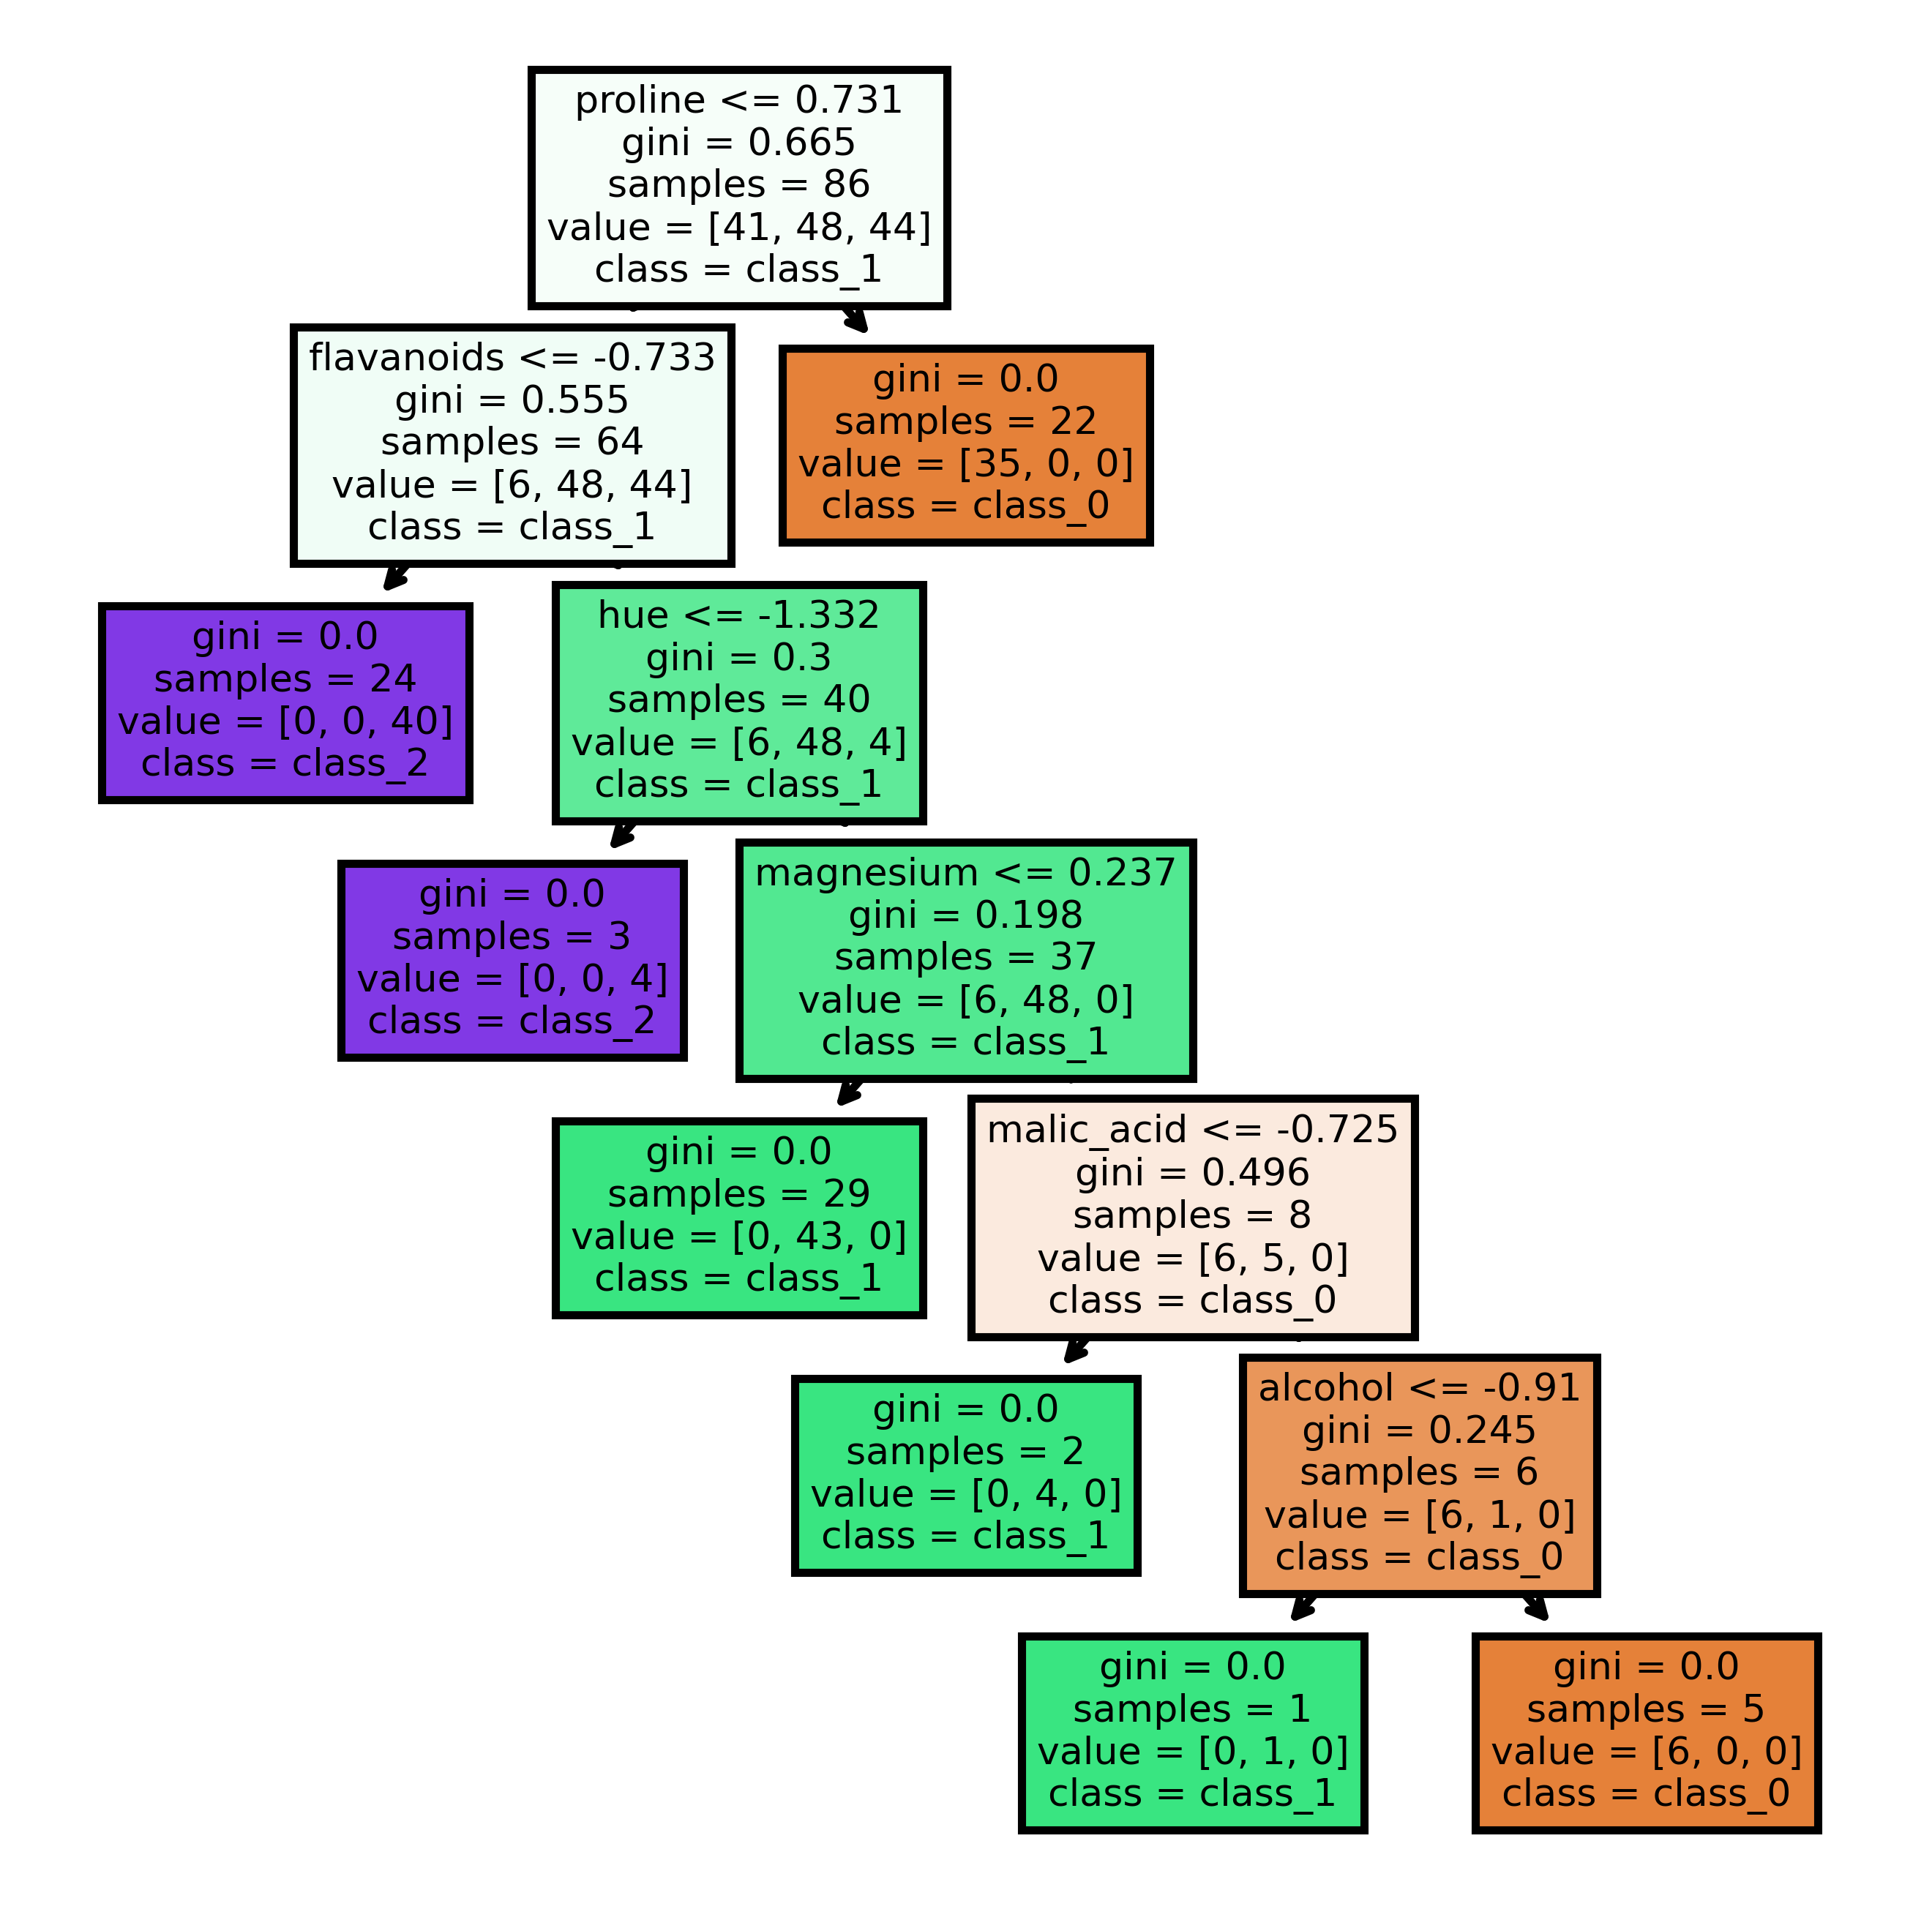

In [136]:
fn=wine_data.feature_names
cn=wine_data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')


Text(0, 0.5, 'Testing Accuracy')

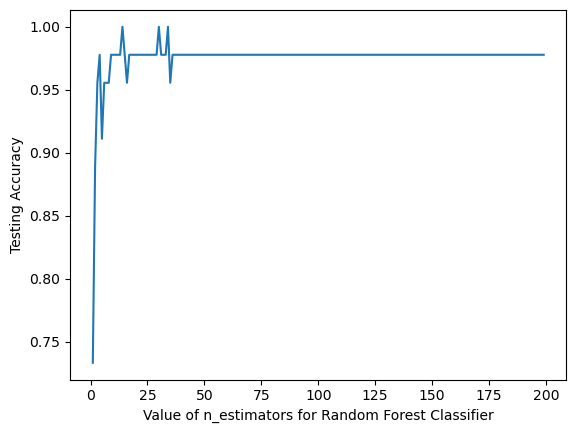

In [137]:
#Test optimum number of n_estimators

scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

### Optimization

In [138]:
# OPTIMIZATION: Redefine X to drop 4 least contributing features and 2 with high GINI scores
X2 = X.drop(['nonflavanoid_phenols','ash','proanthocyanins','magnesium','malic_acid','alcalinity_of_ash','proline'], axis=1)
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=1)

In [139]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [140]:
# Create a random forest classifier. OPTIMIZATION: Adjust n_estimator to 30, the stable point in estimator curve
rf_model = RandomForestClassifier(n_estimators=30, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [141]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [142]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 1", "Predicted 2", "Predicted 3"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [143]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 2,Predicted 3
Actual 1,18,0,0
Actual 2,0,17,0
Actual 3,0,0,10


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [144]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X2.columns), reverse=True)

[(0.27304302858156204, 'flavanoids'),
 (0.21409416514861132, 'color_intensity'),
 (0.14938343329560452, 'alcohol'),
 (0.14713586163464312, 'hue'),
 (0.11789368034423527, 'total_phenols'),
 (0.09844983099534374, 'od280/od315_of_diluted_wines')]

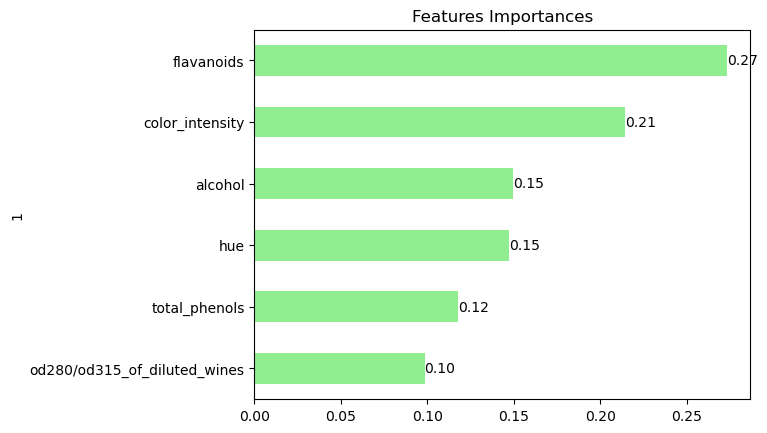

In [145]:

# Plot the horizontal bar chart
ax = importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)

# Add data labels to the bars
for i, v in enumerate(importances_sorted['Feature Importances']):
    ax.text(v, i, f'{v:.2f}', ha='left', va='center')  # Display the value of each bar

# Show the plot
plt.show()

